<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
None
               Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  8514.000000   8512.000000   8510.000000   8485.00000

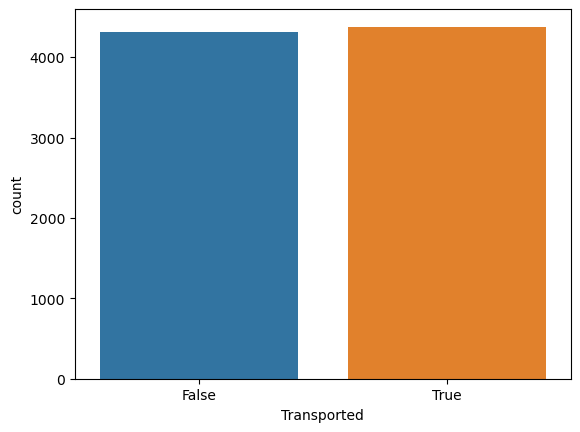

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


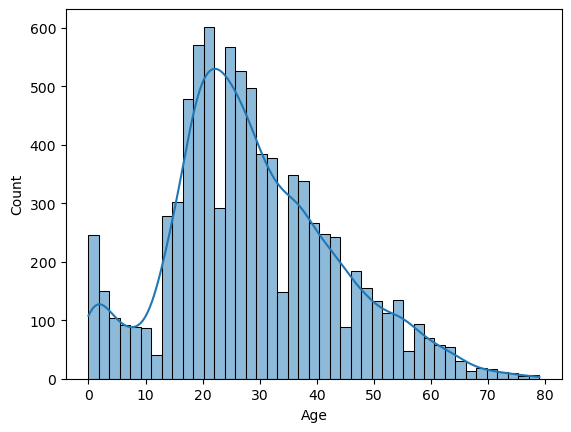

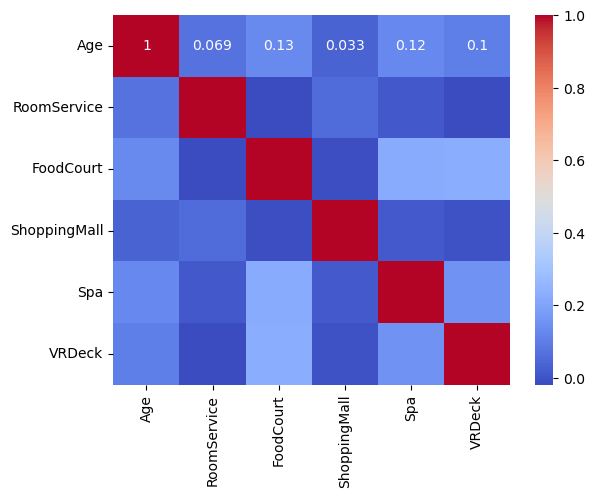

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train_df = pd.read_csv('train (2).csv')

print(train_df.info())

print(train_df.describe())

print(train_df.isnull().sum())

sns.countplot(x='Transported', data=train_df)
plt.show()

sns.histplot(train_df['Age'].dropna(), kde=True)
plt.show()

numerical_df = train_df.select_dtypes(include=['float', 'int']) 
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

train_df.ffill(inplace=True)  

label_encoders = {}
for column in ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Cabin']:
    le = LabelEncoder()
    train_df[column] = le.fit_transform(train_df[column].astype(str))
    label_encoders[column] = le

X = train_df.drop(['Transported', 'PassengerId', 'Name'], axis=1)
y = train_df['Transported']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

model = RandomForestClassifier(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.7619321449108684
              precision    recall  f1-score   support

       False       0.75      0.79      0.77       861
        True       0.78      0.74      0.76       878

    accuracy                           0.76      1739
   macro avg       0.76      0.76      0.76      1739
weighted avg       0.76      0.76      0.76      1739



In [13]:
test_df = pd.read_csv('test (1).csv')

test_df.ffill(inplace=True) 

for column in ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Cabin']:
    le = label_encoders[column]  
    test_df[column] = test_df[column].astype(str).apply(lambda x: le.transform([x])[0] if x in le.classes_ else -1) 

X_test_processed = scaler.transform(test_df.drop(['PassengerId', 'Name'], axis=1))  

test_predictions = model.predict(X_test_processed)  

submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Transported': test_predictions
})

submission.to_csv('submission.csv', index=False)
